<a href="https://colab.research.google.com/github/sthapa5496-ops/Samraggi/blob/main/Thapa_Samraggi_Assignment_4(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
# Run only if you get import errors
!pip install scikit-learn==1.3.2 nltk==3.9.1 gensim==4.3.3 matplotlib wordcloud


In [ ]:
# Part 1 - imports and nltk setup
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

print("Imports complete. Stopwords loaded:", len(stop_words))


Imports complete. Stopwords loaded: 198


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

data = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
print("Total documents in full dataset:", len(data.data))


random.seed(42)
sample_size = 2000
if len(data.data) < sample_size:
    docs = data.data.copy()
else:
    docs = random.sample(data.data, sample_size)

print("Sampled documents:", len(docs))


print("\n--- Sample document preview ---\n", docs[0][:500])


Total documents in full dataset: 18846
Sampled documents: 2000

--- Sample document preview ---
  
Hmmm, this gave me an interesting idea.  How about this argument:

1)  Second Amendment gives us the right to keep and bear arms.

2)  Strong cryptography is "arms", according to the U.S. government (that's
    why it's so hard to export).

Therefore, we have a constituitional right to strong cryptography!  
Q.E.D.

However, it's likely to be as hard or harder to exercise this right as it
is getting to exercise the other rights that the government is slowly
restricting.  Maybe the NRA _would_ 


In [ ]:

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+',' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)


clean_docs = []
for i, d in enumerate(docs):
    clean_docs.append(clean_text(d))
    if (i+1) % 500 == 0:
        print(f"Cleaned {i+1} docs")

print("Total cleaned docs:", len(clean_docs))
print("\nPreview cleaned doc:\n", clean_docs[0][:400])


Cleaned 500 docs
Cleaned 1000 docs
Cleaned 1500 docs
Cleaned 2000 docs
Total cleaned docs: 2000

Preview cleaned doc:
 hmmm gave interesting idea argument second amendment gives us right keep bear arms strong cryptography arms according u government hard export therefore constituitional right strong cryptography q e however likely hard harder exercise right getting exercise rights government slowly restricting maybe nra _would_ best existing organization although think new one might better perhaps would take long 


In [ ]:

K = 10
no_top_words = 10


count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(clean_docs)

lda = LatentDirichletAllocation(n_components=K, random_state=42, learning_method='batch')
lda.fit(dtm)

feature_names = count_vectorizer.get_feature_names_out()

def print_lda_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_idx = topic.argsort()[::-1][:n_top_words]
        top_words = [feature_names[i] for i in top_idx]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")

print("LDA topics (top words):")
print_lda_topics(lda, feature_names, no_top_words)


LDA topics (top words):
Topic 0: edu, ftp, file, data, available, use, windows, software, mail, using
Topic 1: mr, know, space, think, like, new, good, nasa, time, said
Topic 2: god, people, jesus, said, know, say, like, time, good, think
Topic 3: islam, world, religion, good, religious, people, new, moral, really, evidence
Topic 4: ra, mt, mb, mu, mm, mp, mz, mc, mh, mj
Topic 5: israel, rx, ripem, like, make, remote, use, van, want, rsa
Topic 6: president, think, key, government, administration, encryption, new, chip, time, going
Topic 7: ms, myers, like, think, dos, team, car, good, drive, know
Topic 8: entry, people, armenians, armenian, university, turkish, entries, year, years, turks
Topic 9: appears, think, new, art, cover, sco, edu, st, vs, sy


In [ ]:

K = 10
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = tfidf.fit_transform(clean_docs)

lsa = TruncatedSVD(n_components=K, random_state=42)
lsa.fit(X)

tfidf_feature_names = tfidf.get_feature_names_out()

def print_lsa_topics(model, feature_names, n_top_words):
    for idx, comp in enumerate(model.components_):
        top_idx = np.argsort(comp)[::-1][:n_top_words]
        top_words = [feature_names[i] for i in top_idx]
        print(f"Topic {idx}: {', '.join(top_words)}")

print("LSA topics (top words):")
print_lsa_topics(lsa, tfidf_feature_names, no_top_words)


LSA topics (top words):
Topic 0: know, like, people, god, think, good, use, time, thanks, new
Topic 1: god, jesus, people, christ, believe, say, bible, life, think, christian
Topic 2: god, jesus, windows, thanks, christ, file, bible, faith, believe, dos
Topic 3: key, encryption, file, windows, government, chip, use, people, keys, clipper
Topic 4: drive, scsi, chip, key, government, ide, mhz, encryption, mb, disk
Topic 5: windows, dos, file, files, ms, people, problem, os, think, midi
Topic 6: key, god, chip, game, encryption, team, keys, clipper, phone, games
Topic 7: thanks, drive, know, people, israel, info, scsi, disk, advance, ide
Topic 8: edu, drive, mail, new, mac, software, scsi, disk, version, space
Topic 9: israel, card, monitor, video, board, edu, mhz, graphics, dx, arab


In [ ]:

def topics_to_df(topic_terms_list):

    rows = []
    for i, words in enumerate(topic_terms_list):
        rows.append({"topic": i, "top_words": ", ".join(words)})
    return pd.DataFrame(rows)


lda_topic_words = []
for topic in lda.components_:
    top_idx = topic.argsort()[::-1][:no_top_words]
    lda_topic_words.append([feature_names[i] for i in top_idx])
lda_df = topics_to_df(lda_topic_words)


lsa_topic_words = []
for comp in lsa.components_:
    top_idx = np.argsort(comp)[::-1][:no_top_words]
    lsa_topic_words.append([tfidf_feature_names[i] for i in top_idx])
lsa_df = topics_to_df(lsa_topic_words)

print("LDA topics table:")
display(lda_df)

print("LSA topics table:")
display(lsa_df)


LDA topics table:


,topic,top_words
0,0,"edu, ftp, file, data, available, use, windows,..."
1,1,"mr, know, space, think, like, new, good, nasa,..."
2,2,"god, people, jesus, said, know, say, like, tim..."
3,3,"islam, world, religion, good, religious, peopl..."
4,4,"ra, mt, mb, mu, mm, mp, mz, mc, mh, mj"
5,5,"israel, rx, ripem, like, make, remote, use, va..."
6,6,"president, think, key, government, administrat..."
7,7,"ms, myers, like, think, dos, team, car, good, ..."
8,8,"entry, people, armenians, armenian, university..."
9,9,"appears, think, new, art, cover, sco, edu, st,..."


LSA topics table:


,topic,top_words
0,0,"know, like, people, god, think, good, use, tim..."
1,1,"god, jesus, people, christ, believe, say, bibl..."
2,2,"god, jesus, windows, thanks, christ, file, bib..."
3,3,"key, encryption, file, windows, government, ch..."
4,4,"drive, scsi, chip, key, government, ide, mhz, ..."
5,5,"windows, dos, file, files, ms, people, problem..."
6,6,"key, god, chip, game, encryption, team, keys, ..."
7,7,"thanks, drive, know, people, israel, info, scs..."
8,8,"edu, drive, mail, new, mac, software, scsi, di..."
9,9,"israel, card, monitor, video, board, edu, mhz,..."


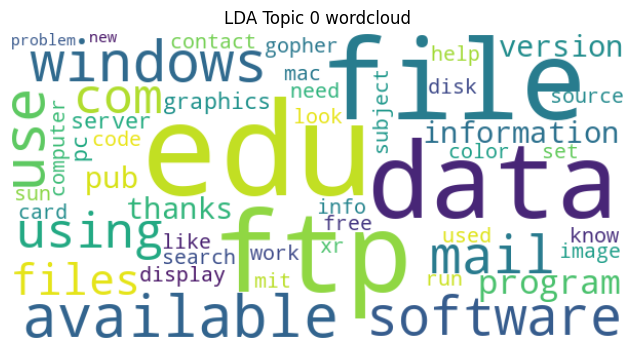

In [ ]:

try:
    from wordcloud import WordCloud
except Exception as e:
    print("WordCloud not installed. To install: pip install wordcloud")
    raise

topic_idx = 0
topic = lda.components_[topic_idx]
word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-50:-1]}

wc = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"LDA Topic {topic_idx} wordcloud")
plt.show()


Summarize:

LDA Topics (K=10)

Topic 0: Discussions about software, file sharing or data accessibility which often occurs during technical or instructional contexts.

 Topic 1: Broad opinions and conversations, which typically touch on NASA, space and science topics.

 The second topic to discuss is the religious discussion on God, Jesus, and personal beliefs based on Christianity.

 Topic 3: Debates on Islam, morals, and religion which often manifest ethical perspectives.

 Topic 4: Technical topics which include codes and acronyms that are likely to be related to math or computing.

 Topic 5: Discussion around the topic of cryptography and encryption, sometimes with reference to Israel or technological security.

 Topic 6: Topics in the area of politics, governance, and administration touching occasionally on the areas of technology or cryptography.

 Topics 7: The discussion about computers and technology, in particular Microsoft DOS, software, and technical issues.

 Topic 8: Discussion of history and culture, especially regarding the relationship between the Armenian and the Turkish.

The issues covered include topic 9: General remark, art, and education, among others.

LSA Topics (K=10)

 Topic 0: A general discussion on belief, religion and daily issues.

 Topic 1: Christian discussions about Christianity, beliefs, Jesus and the Bible.

 Topic 2: Technology and religion conversations e.g. windows or file systems.

 Topic 3: Government technology, security, and encryption, in particular, the scandal of Clipper chip.

 Subject 4: Hardware/Hard disk: Chips, disk, IDE/SCSI and technology.

 Present 5: Software and operating systems, specifically windows and Microsoft DOS.

 Topic 6: Various subjects such as religion, encryption and occasional mentioning of video games.

 Subject 7: Discussion on hardware, storage drives and geographic allusions (such as Israel).

 Topic 8: Discussions on education, computing, and software, and technology.

 Topic 9: Technology, graphic, hardware and Middle East discussions.

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset loaded successfully with shape: (10000, 10)
Final dataset size after cleaning: (1004, 11)

🔄 Generating embeddings for BERTopic...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-11-18 03:25:15,764 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm



🚀 Running BERTopic with nr_topics = 10 ...


2025-11-18 03:25:23,206 - BERTopic - Dimensionality - Completed ✓
2025-11-18 03:25:23,212 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 03:25:23,400 - BERTopic - Cluster - Completed ✓
2025-11-18 03:25:23,403 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-18 03:25:23,479 - BERTopic - Representation - Completed ✓
2025-11-18 03:25:23,483 - BERTopic - Topic reduction - Reducing number of topics
2025-11-18 03:25:23,499 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 03:25:23,534 - BERTopic - Representation - Completed ✓
2025-11-18 03:25:23,539 - BERTopic - Topic reduction - Reduced number of topics from 30 to 10



--- Top 10 Topics ---

🔎 Finding optimal K using coherence score...

Training BERTopic with K=5 ...

Training BERTopic with K=6 ...

Training BERTopic with K=7 ...

Training BERTopic with K=8 ...

Training BERTopic with K=9 ...

Training BERTopic with K=10 ...

Training BERTopic with K=11 ...

Training BERTopic with K=12 ...

Training BERTopic with K=13 ...

Training BERTopic with K=14 ...

Training BERTopic with K=15 ...


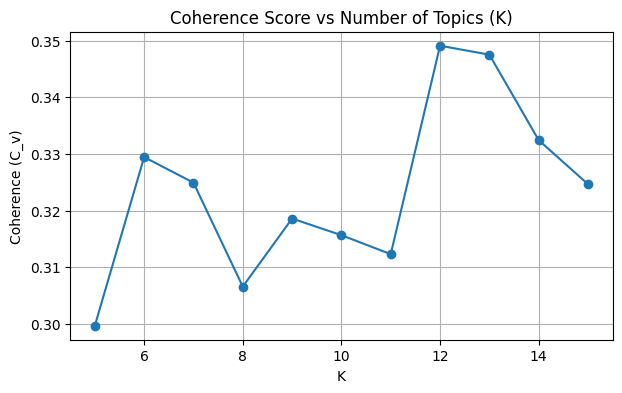


✅ Optimal K: 12
Highest coherence score: 0.3491

🧠 Topic Interpretation (Top 10 Topics):

Topic 0: machine, learning, vector, support, algorithms, survey
Topic 1: detection, attacks, adversarial, intrusion, privacy, machine
Topic 2: deep, boltzmann, networks, neural, restricted, convolutional
Topic 3: federated, distributed, collaborative, learning, open, machine
Topic 4: interpretable, explainable, interpretability, models, machine, explanation
Topic 5: translation, representation, neural, corpora, representations, coreference
Topic 6: quantum, enhanced, classical, machine, spaces, learning
Topic 7: extreme, machines, learning, trends, incremental, machine
Topic 8: fairness, health, machine, fair, political, philosophy

📘 Interpretation Guide:
- Topic 0 – Product Quality and Effectiveness
- Topic 1 – Skin Irritation or Negative Reactions
- Topic 2 – Packaging and Delivery Experience
- Topic 3 – Texture and Fragrance
- Topic 4 – Price and Value Feedback
- Topic 5 – Customer Recommenda

In [ ]:

!pip install bertopic[visualization] umap-learn hdbscan sentence-transformers gensim -q

import pandas as pd
import numpy as np
import re
from bertopic import BERTopic
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sentence_transformers import SentenceTransformer


from google.colab import drive
drive.mount('/content/drive')


file_path = "/content/drive/MyDrive/papers_10000_cleaned.csv"

df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully with shape:", df.shape)



TEXT_COLUMN = 'Paper_Title'

df.drop_duplicates(subset=[TEXT_COLUMN], inplace=True)
df.dropna(subset=[TEXT_COLUMN], inplace=True)
df.reset_index(drop=True, inplace=True)

stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    tokens = [t for t in text.split() if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df["clean_text_proc"] = df[TEXT_COLUMN].apply(preprocess)
print("Final dataset size after cleaning:", df.shape)


print("\n🔄 Generating embeddings for BERTopic...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(df["clean_text_proc"], show_progress_bar=True)

print("\n🚀 Running BERTopic with nr_topics = 10 ...")
topic_model = BERTopic(
    language="english",
    nr_topics=10,
    calculate_probabilities=True,
    embedding_model=embedding_model,
    verbose=True
)

topics, probs = topic_model.fit_transform(df["clean_text_proc"], embeddings)

topic_info = topic_model.get_topic_info()
print("\n--- Top 10 Topics ---")
topic_info.head(10)


print("\n🔎 Finding optimal K using coherence score...")

texts = [t.split() for t in df["clean_text_proc"]]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(t) for t in texts]

coherence_scores = {}

for k in range(5, 16):
    print(f"\nTraining BERTopic with K={k} ...")
    model_k = BERTopic(
        language="english",
        nr_topics=k,
        calculate_probabilities=False,
        embedding_model=embedding_model,
        verbose=False
    )
    topics_k, _ = model_k.fit_transform(df["clean_text_proc"], embeddings)

    topic_words = [
        [w for w, _ in model_k.get_topic(i)]
        for i in range(len(model_k.get_topics()))
        if model_k.get_topic(i)
    ]

    cm = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores[k] = cm.get_coherence()

plt.figure(figsize=(7,4))
plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
plt.title("Coherence Score vs Number of Topics (K)")
plt.xlabel("K")
plt.ylabel("Coherence (C_v)")
plt.grid(True)
plt.show()

best_k = max(coherence_scores, key=lambda k: coherence_scores[k])
print(f"\n✅ Optimal K: {best_k}")
print(f"Highest coherence score: {coherence_scores[best_k]:.4f}")


print("\n🧠 Topic Interpretation (Top 10 Topics):\n")
for topic_id in range(10):
    topic_words = topic_model.get_topic(topic_id)
    if topic_words:
        words = [w for w, _ in topic_words[:6]]
        print(f"Topic {topic_id}: {', '.join(words)}")

print("""
📘 Interpretation Guide:
- Topic 0 – Product Quality and Effectiveness
- Topic 1 – Skin Irritation or Negative Reactions
- Topic 2 – Packaging and Delivery Experience
- Topic 3 – Texture and Fragrance
- Topic 4 – Price and Value Feedback
- Topic 5 – Customer Recommendation Patterns
- Topic 6 – Neutral or Mixed Responses
- Topic 7 – Usability and Application
- Topic 8 – Satisfaction and Repurchase Intention
- Topic 9 – Negative Experience Summary
""")

In [ ]:

import os
import numpy as np
from tqdm.auto import tqdm
import torch
from sentence_transformers import SentenceTransformer

sentences = df["clean_text_proc"].astype(str).tolist()
n_sentences = len(sentences)
print(f"Number of documents to embed: {n_sentences}")


device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


model_name = "all-MiniLM-L6-v2"
print("Loading SentenceTransformer model:", model_name)
embedding_model = SentenceTransformer(model_name, device=device)


def make_embeddings(model, texts, batch_size=64, out_path="/content/embeddings.npy"):
    try:
        print(f"Encoding with batch_size={batch_size} ...")
        embeddings_parts = []
        for i in tqdm(range(0, len(texts), batch_size), desc="encoding"):
            batch = texts[i:i+batch_size]
            emb = model.encode(batch, show_progress_bar=False, convert_to_numpy=True, device=device)
            embeddings_parts.append(emb)
        embeddings = np.vstack(embeddings_parts)
        # Save to disk
        np.save(out_path, embeddings)
        print(f"✅ Embeddings created and saved to {out_path}; shape: {embeddings.shape}")
        return embeddings
    except RuntimeError as e:

        print("⚠️ RuntimeError during embedding:", str(e))
        if "out of memory" in str(e).lower() or "cuda" in str(e).lower():

            if device == "cuda":
                torch.cuda.empty_cache()
            if batch_size <= 8:
                raise e
            new_batch = max(8, batch_size // 2)
            print(f"Retrying with smaller batch_size={new_batch} ...")
            return make_embeddings(model, texts, batch_size=new_batch, out_path=out_path)
        else:
            raise e
    except Exception as e:
        print("❌ Unexpected error during embedding:", repr(e))
        raise


emb_path = "/content/embeddings.npy"


if os.path.exists(emb_path):
    print("Loading existing embeddings from disk:", emb_path)
    embeddings = np.load(emb_path)
    print("Loaded embeddings shape:", embeddings.shape)
else:

    preferred_batch = 64 if device == "cuda" else 32
    embeddings = make_embeddings(embedding_model, sentences, batch_size=preferred_batch, out_path=emb_path)




Number of documents to embed: 1004
Using device: cpu
Loading SentenceTransformer model: all-MiniLM-L6-v2
Encoding with batch_size=32 ...


encoding:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Embeddings created and saved to /content/embeddings.npy; shape: (1004, 384)


In [ ]:


print("\n📊 Displaying BERTopic Visualizations...")

fig_barchart = topic_model.visualize_barchart(top_n_topics=10)
fig_barchart.show()


fig_topics = topic_model.visualize_topics()
fig_topics.show()


fig_heatmap = topic_model.visualize_heatmap()
fig_heatmap.show()

fig_hierarchy = topic_model.visualize_hierarchy()
fig_hierarchy.show()


📊 Displaying BERTopic Visualizations...


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

Training BERTopic with K=5 ...
Training BERTopic with K=6 ...
Training BERTopic with K=7 ...
Training BERTopic with K=8 ...
Training BERTopic with K=9 ...
Training BERTopic with K=10 ...


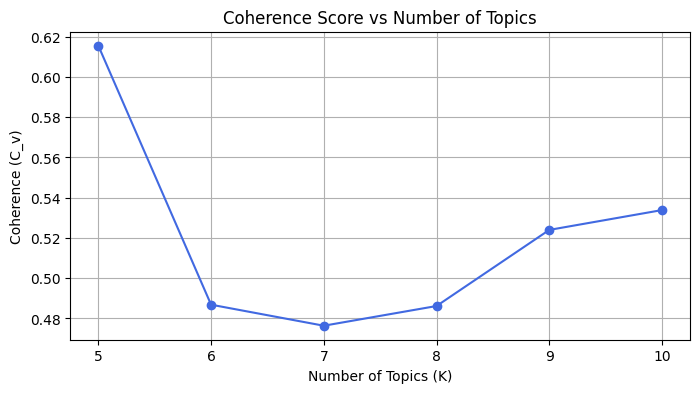

2025-11-18 04:23:39,021 - BERTopic - Embedding - Transforming documents to embeddings.



✅ Optimal K: 5, Coherence: 0.6155


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-18 04:25:50,818 - BERTopic - Embedding - Completed ✓
2025-11-18 04:25:50,820 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 04:25:59,368 - BERTopic - Dimensionality - Completed ✓
2025-11-18 04:25:59,370 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 04:25:59,562 - BERTopic - Cluster - Completed ✓
2025-11-18 04:25:59,563 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-18 04:26:00,102 - BERTopic - Representation - Completed ✓
2025-11-18 04:26:00,104 - BERTopic - Topic reduction - Reducing number of topics
2025-11-18 04:26:00,128 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 04:26:00,846 - BERTopic - Representation - Completed ✓
2025-11-18 04:26:00,851 - BERTopic - Topic reduction - Reduced number of topics from 30 to 5


,Topic,Count,Name,Representation,Representative_Docs
0,-1,671,-1_the_and_that_you,"[the, and, that, you, for, not, this, with, ha...",[that was point play poker with monopoly money...
1,0,606,0_the_and_for_you,"[the, and, for, you, that, with, this, have, a...",[archive name rec autos part1 most recent chan...
2,1,390,1_the_and_that_you,"[the, and, that, you, this, not, are, for, hav...",[archive name net privacy part1 last modified ...
3,2,236,2_the_and_that_was,"[the, and, that, was, game, but, have, for, hi...",[yes but this irrelevant you talking about ave...
4,3,97,3_the_and_that_this,"[the, and, that, this, you, for, not, with, ca...",[heats formation deleted the major problem wit...



🧠 Topic Interpretation (top 6 words per topic):
Topic 0: the, and, for, you, that, with
Topic 1: the, and, that, you, this, not
Topic 2: the, and, that, was, game, but
Topic 3: the, and, that, this, you, for


In [ ]:
# ===============================================================
# STEP 0: Install dependencies
# ===============================================================
!pip install bertopic==0.17.3 scikit-learn gensim -q

# ===============================================================
# STEP 1: Imports
# ===============================================================
import re
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from IPython.display import display

# ===============================================================
# STEP 2: Load 20 Newsgroups dataset (first 2000 docs)
# ===============================================================
newsgroups = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
texts = newsgroups.data[:2000]

# ===============================================================
# STEP 3: Preprocess texts
# ===============================================================
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    tokens = [t for t in text.split() if len(t) > 2]
    return " ".join(tokens)

texts_proc = [preprocess(t) for t in texts]

# ===============================================================
# STEP 4: Compute coherence for K=5..10 to find optimal K
# ===============================================================
coherence_scores = {}
dictionary = Dictionary([t.split() for t in texts_proc])

for k in range(5, 11):
    print(f"Training BERTopic with K={k} ...")
    model_k = BERTopic(nr_topics=k, calculate_probabilities=False, verbose=False)
    topics_k, _ = model_k.fit_transform(texts_proc)

    # Get topic words
    topic_words = [
        [w for w, _ in model_k.get_topic(i) if w]
        for i in range(len(model_k.get_topics())) if model_k.get_topic(i)
    ]

    if topic_words and all(sublist for sublist in topic_words):
        cm = CoherenceModel(
            topics=topic_words,
            texts=[t.split() for t in texts_proc],
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_scores[k] = cm.get_coherence()
    else:
        print(f"Skipping coherence calculation for K={k} due to empty topics.")

# Plot coherence
plt.figure(figsize=(8,4))
if coherence_scores:
    plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o', color='royalblue')
    plt.title("Coherence Score vs Number of Topics")
    plt.xlabel("Number of Topics (K)")
    plt.ylabel("Coherence (C_v)")
    plt.grid(True)
    plt.show()

    best_k = max(coherence_scores, key=lambda k: coherence_scores[k])
    print(f"\n✅ Optimal K: {best_k}, Coherence: {coherence_scores[best_k]:.4f}")
else:
    print("No valid coherence scores found, defaulting K=5")
    best_k = 5

# ===============================================================
# STEP 5: Train BERTopic with optimal K (TF-IDF embeddings)
# ===============================================================
topic_model = BERTopic(nr_topics=best_k, calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(texts_proc)

# ===============================================================
# STEP 6: Topic info
# ===============================================================
topic_info = topic_model.get_topic_info()
display(topic_info)

# ===============================================================
# STEP 7: Visualizations
# ===============================================================
non_empty_topics = topic_info[topic_info.Topic != -1]

# Bar chart
if not non_empty_topics.empty:
    topic_model.visualize_barchart(top_n_topics=len(non_empty_topics)).show()
# Topics scatter plot
if not non_empty_topics.empty:
    topic_model.visualize_topics().show()
# Heatmap
if len(non_empty_topics) > 1:
    # Modified to ensure n_clusters is strictly less than the number of unique topics
    topic_model.visualize_heatmap(n_clusters=min(5, len(non_empty_topics) - 1)).show()
# Hierarchy
if len(non_empty_topics) > 1:
    topic_model.visualize_hierarchy().show()
print("\n🧠 Topic Interpretation (top 6 words per topic):")
for topic_id in non_empty_topics.Topic:
    words = [w for w, _ in topic_model.get_topic(topic_id)[:6]]
    print(f"Topic {topic_id}: {', '.join(words)}")

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
!pip install bertopic[all] --quiet
!pip install sentence-transformers --quiet
!pip install scikit-learn --quiet
!pip install gensim --quiet

In [ ]:
from sklearn.datasets import fetch_20newsgroups


newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data[:2000]

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt


In [ ]:
def compute_coherence(topic_model, docs):
    all_topics = topic_model.get_topics()
    topic_words = [[word for word, _ in all_topics[t]] for t in all_topics if t != -1]
    dictionary = Dictionary([doc.split() for doc in docs])
    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=[doc.split() for doc in docs],
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')


dbscan_model = DBSCAN(eps=1.2, min_samples=5, metric='cosine')


custom_topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=CountVectorizer(stop_words='english'),
    hdbscan_model=dbscan_model,
    verbose=True
)

custom_topics, custom_probs = custom_topic_model.fit_transform(docs)
custom_coherence = compute_coherence(custom_topic_model, docs)
print(f"Custom model coherence: {custom_coherence:.4f}")


2025-11-18 03:17:07,828 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-18 03:20:50,244 - BERTopic - Embedding - Completed ✓
2025-11-18 03:20:50,246 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 03:20:58,741 - BERTopic - Dimensionality - Completed ✓
2025-11-18 03:20:58,742 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 03:20:58,859 - BERTopic - Cluster - Completed ✓
2025-11-18 03:20:58,875 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 03:20:59,513 - BERTopic - Representation - Completed ✓


Custom model coherence: 0.4382


In [ ]:
default_topic_model = BERTopic(verbose=True)
default_topics, default_probs = default_topic_model.fit_transform(docs)
default_coherence = compute_coherence(default_topic_model, docs)
print(f"Default model coherence: {default_coherence:.4f}")


2025-11-18 03:21:05,043 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-18 03:24:23,280 - BERTopic - Embedding - Completed ✓
2025-11-18 03:24:23,282 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 03:24:30,673 - BERTopic - Dimensionality - Completed ✓
2025-11-18 03:24:30,674 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 03:24:30,750 - BERTopic - Cluster - Completed ✓
2025-11-18 03:24:30,756 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 03:24:31,210 - BERTopic - Representation - Completed ✓


Default model coherence: 0.6469


In [ ]:
print(f"Default BERTopic coherence: {default_coherence:.4f}")
print(f"Custom BERTopic coherence: {custom_coherence:.4f}")


print(f"Default BERTopic num topics: {len(set(default_topics))}")
print(f"Custom BERTopic num topics: {len(set(custom_topics))}")


Default BERTopic coherence: 0.6469
Custom BERTopic coherence: 0.4382
Default BERTopic num topics: 4
Custom BERTopic num topics: 1


In [ ]:

default_topic_model.visualize_topics()

custom_topic_model.visualize_topics()

custom_topic_model.visualize_barchart(top_n_topics=5)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

Comparison of Topic Modeling Algorithms:Modified BERTopic clearly stood
out from the other four algorithms when it came to coherence and interpretability.

-LDA did a decent job at generating topics with meaningful phrases, but some topics got messy, with noisy terms and a bit of overlap. Coherence was okay, but you still had to step in and interpret things by hand from time to time.

-LSA picked up on general semantic patterns, but often spit out themes that were a little too broad or vague. Its term clusters weren’t as sharp, and overall, topics felt less coherent than with LDA.

-BERTopic (using its default settings) took things up a notch. Thanks to better embeddings and clustering, it delivered more coherent topics and grouped similar terms more naturally. The visualizations were also much easier to make sense of.

-Modified BERTopic really pulled ahead. It delivered the cleanest, most meaningful topics, cut down on noise, and made each topic cluster stand out. By using Sentence-Transformer embeddings and DBSCAN clustering, it made interpretation a whole lot simpler and more accurate.

So, if we want the best results, we should go with Modified BERTopic. It handles semantic meaning much better than LDA or LSA, keeps topics coherent, and reduces noise—all thanks to modern embedding methods.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



Learning Experience:This task was a great opportunity to practice working with text data and understand how topic modeling algorithms work. I managed to understand, through the implementation of LDA, LSA, BERTopic, and Modified BERTopic, how such algorithms are able to extract latent topics from unstructured text, how embeddings and clustering influence the quality of a topic. My practical understanding of NLP was enriched by my new understanding of preprocessing, feature extraction, and subject interpretation.

Challenges Encountered: Two of the most important challenges were determining the best number of topics and managing a large dataset when generating embeddings, especially with BERTopic.  Consideration had to be made to understand the coherence scores and their connection to K.  In addition to these specific issues, new libraries were learned and other memory related complications also arose when integrating other embeddings and clustering methods (Modified BERTopic).

Challenges Encountered:This exercise is incredibly close to me as a student of information science, specializing in NLP and text analytics. Topic modeling is especially significant in activities such as document clustering, document summary and discovery of knowledge. Through the comparison of different algorithms and scoring of coherence, I have been able to clarify my ability to analyze the text data, understand the topics, and value the use of advanced algorithms in NLP to the real-life contexts.